In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
colunms_name=['sepal_length','sepal_width','petal_length','petal_width','class']
df=pd.read_table('G:\\internship\\data sets\\Iris\\iris\\bezdekIris.data',sep=',',names=colunms_name)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
pd.set_option('Display.max_columns',None)
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.duplicated().sum()

1

In [5]:
df=df.drop_duplicates()
df.shape

(149, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

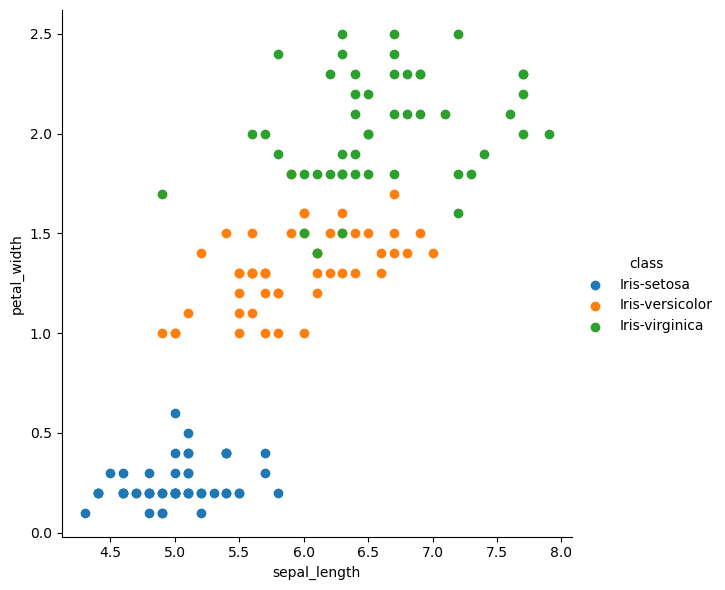

In [8]:
sns.FacetGrid(df,hue='class',height=6).map(plt.scatter,'sepal_length','petal_width').add_legend()

In [9]:
d_clolumns=['sepal_length','sepal_width','sepal_width', 'petal_width','class']
for x in d_clolumns:
    print('for',x)
    s=df[x].value_counts()
    print(s)

for sepal_length
5.0    10
5.1     9
6.3     9
6.7     8
5.7     8
5.5     7
6.4     7
4.9     6
5.8     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64
for sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64
for sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64
for petal_width
0.2    29
1.3    13
1.8    1

In [14]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: class, dtype: int64

In [15]:
#converting catigoral data into int
mapp={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['class']=df['class'].map(mapp)

C:\Users\AbdelrahmanFMoahamed\AppData\Local\Temp\ipykernel_28932\2586954903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class']=df['class'].map(mapp)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [17]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
90,5.5,2.6,4.4,1.2
85,6.0,3.4,4.5,1.6
52,6.9,3.1,4.9,1.5
105,7.6,3.0,6.6,2.1
...,...,...,...,...
50,7.0,3.2,4.7,1.4
78,6.0,2.9,4.5,1.5
57,4.9,2.4,3.3,1.0
6,4.6,3.4,1.4,0.3


In [20]:
reg=LogisticRegression()

In [21]:
reg.fit(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
reg.score(x, y)*100

97.31543624161074

In [ ]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train
reg=LogisticRegression()
reg.fit(x,y)
reg.score(x, y)*100

In [25]:
# Create and train a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing set
predictions = logistic_regression.predict(X_test)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on testing set:", test_accuracy)

# # Calculate accuracy on the training set (not recommended for generalization)
# train_accuracy = accuracy_score(y_train, logistic_regression.predict(X_train))
# print("Accuracy on training set:", train_accuracy)

Accuracy on testing set: 0.9666666666666667
Accuracy on training set: 0.9831932773109243


In [29]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
predictions = random_forest.predict(X_test)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on testing set:", test_accuracy)

# # Calculate accuracy on the training set (not recommended for generalization)
# train_accuracy = accuracy_score(y_train, random_forest.predict(X_train))
# print("Accuracy on training set:", train_accuracy)

Accuracy on testing set: 0.9333333333333333
